In [ ]:
y# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Libraries imported successfully!")


Libraries imported successfully!


## 1. Load and Explore Clean Dataset


In [6]:
# Load the cleaned dataset
df = pd.read_csv('../data/clean_data.csv')

print(f"Dataset shape: {df.shape}")
print(f"\nColumn names:")
print(df.columns.tolist())

# Display first few rows
df.head()


Dataset shape: (2938, 22)

Column names:
['country', 'year', 'status', 'life_expectancy', 'adult_mortality', 'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b', 'measles', 'bmi', 'under_five_deaths', 'polio', 'total_expenditure', 'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness__1_19_years', 'thinness_5_9_years', 'income_composition_of_resources', 'schooling']


,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [7]:
# Basic dataset information
print("Dataset Info:")
print(df.info())

print("\nMissing values:")
print(df.isnull().sum())

print("\nBasic statistics:")
df.describe()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2938 non-null   object 
 1   year                             2938 non-null   int64  
 2   status                           2938 non-null   object 
 3   life_expectancy                  2938 non-null   float64
 4   adult_mortality                  2938 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   alcohol                          2938 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   hepatitis_b                      2938 non-null   float64
 9   measles                          2938 non-null   int64  
 10  bmi                              2938 non-null   float64
 11  under_five_deaths                2938 non-null   int64  
 12  polio 

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.938190,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.507640,124.080302,117.926501,3.916288,1987.914858,22.586855,11467.272489,19.927677,160.445548,23.352143,2.400274,23.640073,5.077785,13136.800417,5.381546e+07,4.394535,4.482708,0.204820,3.264381
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.200000,74.000000,0.000000,1.092500,4.685343,80.940461,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,2008.000000,72.000000,144.000000,3.000000,4.160000,64.912906,87.000000,17.000000,43.000000,4.000000,93.000000,5.938190,93.000000,0.100000,3116.561755,3.675929e+06,3.400000,3.400000,0.662000,12.100000
75%,2012.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,7483.158469,1.275338e+07,7.100000,7.200000,0.772000,14.100000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


## 2. Data Preparation for Modeling


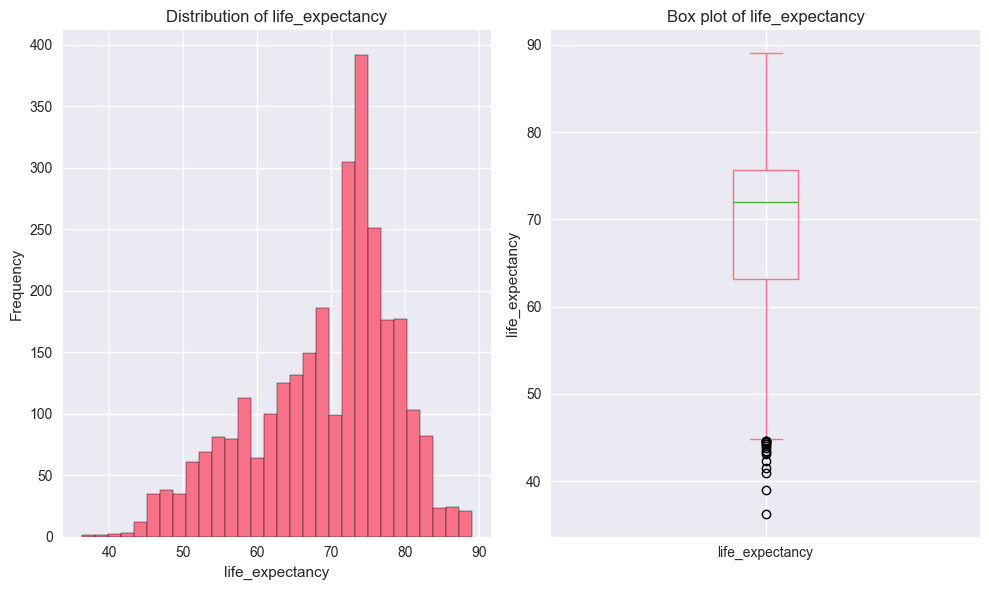

Target variable statistics:
count    2938.000000
mean       69.224932
std         9.507640
min        36.300000
25%        63.200000
50%        72.000000
75%        75.600000
max        89.000000
Name: life_expectancy, dtype: float64


In [8]:
# Define target variable
target = 'life_expectancy'

# Check target variable distribution
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
df[target].hist(bins=30, edgecolor='black')
plt.title(f'Distribution of {target}')
plt.xlabel(target)
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
df[target].plot(kind='box')
plt.title(f'Box plot of {target}')
plt.ylabel(target)

plt.tight_layout()
plt.show()

print(f"Target variable statistics:")
print(df[target].describe())


In [ ]:
# Prepare features and target
print("Preparing features and target...")

# Exclude non-feature columns
exclude_cols = ['country', 'year', 'status', target]
feature_cols = [col for col in df.columns if col not in exclude_cols]

print(f"Features to use: {len(feature_cols)}")
print(f"Feature names: {feature_cols}")

# Create feature matrix and target vector
X = df[feature_cols]
y = df[target]

print(f"\nFeature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")

# Check for any remaining missing values in features
missing_values = X.isnull().sum()
print(f"\nMissing values in features:")
print(missing_values[missing_values > 0])

# Display first few rows of features
print(f"\nFirst 5 rows of features:")
X.head()
